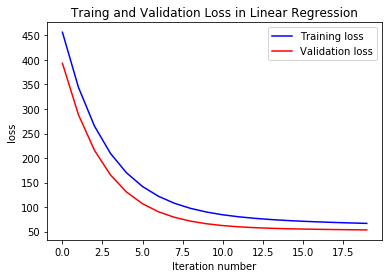

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 计算Loss
def Loss(X, y, w):
    row,col = X.shape
    return  np.transpose(y - X .dot(w)).dot(y - X.dot(w))/row


# 加载数据并分离测试集和验证集
X, y = load_svmlight_file('housing_scale.txt')
row, col = X.shape
X = X.toarray()
y = y.reshape(row, 1)
X = np.column_stack((X, np.ones((row, 1))))
X_train, X_validation, y_train, y_validation = train_test_split(X, y , test_size=0.33, random_state=42 )

# 初始化数据, T是轮数, alpha是学习率
row, col = X_train.shape
w = np.zeros((col, 1))
T = 20
alpha = 0.0001

# 训练集和测试集LOSS
train_loss = np.zeros(T)
validation_loss = np.zeros(T)

# 梯度下降
for turns in range(T):
    grad = - np.transpose(X_train).dot(y_train) + np.transpose(X_train).dot(X_train.dot(w))
    w = w - alpha * grad
    train_loss[turns] = Loss(X_train, y_train, w)
    validation_loss[turns] = Loss(X_validation, y_validation, w)

# 
# y_prediction = X_validation.dot(w)
# row, col = y_validation.shape
# axis = range(row)
# plt.figure()
# plt.xlabel("Iteration number")
# plt.ylabel("Label value")
# plt.plot(axis, y_validation.ravel(), color="blue", label="validation")
# plt.plot(axis, y_prediction.ravel(), color="red", label="prediction")
# plt.legend(loc="upper right")
# plt.show()
#print (b)
#print(y_validation)
    
# 绘图
plt.figure()
plt.title("Traing and Validation Loss in Linear Regression")
plt.xlabel("Iteration number")
plt.ylabel("loss")
x_axis = range(T)
plt.plot(x_axis, train_loss,color="blue",linestyle="-",label="Training loss")
plt.plot(x_axis, validation_loss,color="red",linestyle="-",label="Validation loss")
plt.legend(loc="upper right")
plt.show()
    
# write your code here